# Basic

In [1]:
import pandas as pd
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
import joblib
from typing import List, Dict


/home/abpal/miniconda3/envs/bertopic_env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Comprehensiveness Test

In [2]:
from sklearn.datasets import fetch_20newsgroups
newsgroups_train = fetch_20newsgroups(subset='train')

import re

def clean_text(text):
    # Remove escape sequences
    text = re.sub(r'\\[a-zA-Z]', ' ', text)

    # Remove email addresses
    text = re.sub(r'\S+@\S+', ' ', text)

    # Remove punctuation
    text = re.sub(r'[^\w\s]', ' ', text)

    # Remove extra whitespace
    text = ' '.join(text.split())

    return text

# Example usage:
text = "Hello, this is an example text with an email address john@example.com. \nPlease remove punctuation and escape sequences, including \\n."
cleaned_text = clean_text(text)
print(cleaned_text)


from tqdm import tqdm

docs = []
for text in tqdm(newsgroups_train["data"]):
  docs.append(clean_text(text))

Hello this is an example text with an email address Please remove punctuation and escape sequences including


100%|██████████| 11314/11314 [00:00<00:00, 12723.20it/s]


In [3]:
docs = []
count = 0
for text in tqdm(newsgroups_train["data"]):
  count+=1
  docs.append(clean_text(text) + f" c_{count}")

topic_model = BERTopic()
topics, probs = topic_model.fit_transform(docs)
topic_model.get_topic_info()



  0%|          | 0/11314 [00:00<?, ?it/s]

100%|██████████| 11314/11314 [00:00<00:00, 12652.78it/s]


,Topic,Count,Name,Representation,Representative_Docs
0,-1,4080,-1_the_to_of_and,"[the, to, of, and, in, for, is, from, it, that]",[From Subject Hell_2 Black Sabbath Organizatio...
1,0,313,0_clipper_encryption_key_chip,"[clipper, encryption, key, chip, escrow, keys,...",[From Clipper Chip Announcement Subject text o...
2,1,169,1_bike_dod_bikes_motorcycle,"[bike, dod, bikes, motorcycle, tires, honda, r...",[From Frank Perdicaro Subject ST1100 ride Keyw...
3,2,166,2_windows_dos_swap_memory,"[windows, dos, swap, memory, file, disk, ram, ...",[From Gregg Walters Subject Mathcad 4 0 swap f...
4,3,165,3_os2_os_mail_address,"[os2, os, mail, address, comp, japanese, envir...",[From Stephen D Brener Subject Japanese for Sc...
...,...,...,...,...,...
222,221,11,221_jpeg_gif_image_images,"[jpeg, gif, image, images, color, format, jfif...",[From Allen B Subject Re Fractals what good ar...
223,222,11,222_cement_plant_court_boomer,"[cement, plant, court, boomer, plaintiffs, atl...",[From Matt Block Subject Re Fortune guzzler ba...
224,223,11,223_solar_sail_accelerations_sails,"[solar, sail, accelerations, sails, 45g, laxma...",[From Bill Higgins Beam Jockey Subject Re Sola...
225,224,10,224_weapons_destruction_foxvog_mass,"[weapons, destruction, foxvog, mass, weapon, n...",[From Foxvog Douglas Subject Re Rewording the ...


# keybert

In [42]:
from bertopic.representation import KeyBERTInspired
from bertopic import BERTopic

# Create your representation model
representation_model = KeyBERTInspired()

# Use the representation model in BERTopic on top of the default pipeline
topic_model_kb = BERTopic(representation_model=representation_model)

In [43]:
topic_model_normal = BERTopic()
topics1, probs1 = topic_model_kb.fit_transform(docs)
topics2, probs2 = topic_model_normal.fit_transform(docs)


In [11]:
topic_model_normal.get_topic_info(5)

,Topic,Count,Name,Representation,Representative_Docs
0,5,86,5_polygon_points_sphere_p3,"[polygon, points, sphere, p3, p2, den, p1, rad...",[From Steve Worley Subject Re Sphere from 4 po...


In [44]:
topic_model_kb.get_topic_info(5)

,Topic,Count,Name,Representation,Representative_Docs
0,5,131,5_buick_nissan_ford_mustang,"[buick, nissan, ford, mustang, chrysler, car, ...",[From Chuck Kesler Subject Re Ford Probe Opini...


In [45]:
topic_model_kb.topic_representations_[0]

[('cubs', 0.51392275),
 ('sox', 0.48742664),
 ('hitter', 0.48362732),
 ('pitching', 0.479284),
 ('pitchers', 0.4740411),
 ('braves', 0.45773667),
 ('jays', 0.43363196),
 ('mets', 0.43253994),
 ('rbi', 0.42504215),
 ('baseball', 0.42431813)]

In [46]:
topic_model_normal.topic_representations_[0]

[('gun', 0.016961638542872838),
 ('guns', 0.009700746447913937),
 ('firearms', 0.007502741968220677),
 ('weapons', 0.006564555854866429),
 ('militia', 0.006138514051224382),
 ('control', 0.005356879866167208),
 ('amendment', 0.005269837952295778),
 ('of', 0.005129766649494423),
 ('crime', 0.004888086971253259),
 ('you', 0.0047881986187372425)]

In [33]:
topic_model.get_topic_info()["Representation"][0]

['the', 'to', 'of', 'for', 'and', 'in', 'is', 'you', 'it', 'from']

In [32]:
topic_model.topic_representations_[-1]

[('the', 0.004128683382890082),
 ('to', 0.004076735348021822),
 ('of', 0.003982869108336872),
 ('for', 0.00388239863520089),
 ('and', 0.003841762632529283),
 ('in', 0.0037652363476642194),
 ('is', 0.0037414406543137897),
 ('you', 0.0037169952033305337),
 ('it', 0.003688680415734622),
 ('from', 0.0036491534597114924)]

In [4]:

def remove_word_from_list(word_to_remove, string_list):
    return [string.replace(word_to_remove, '') for string in string_list]

Changed : 15.26697896411526 , Unchanged  : 84.7330210358847


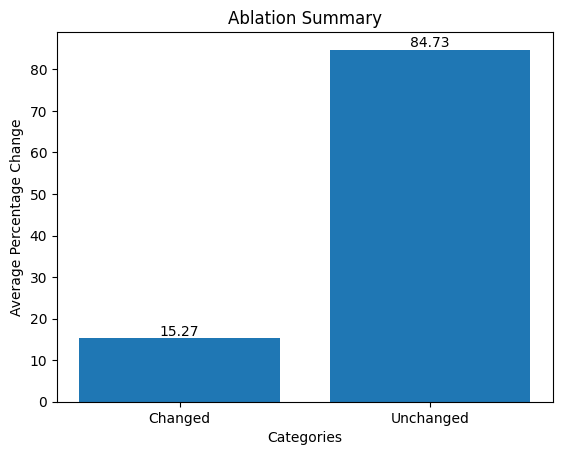

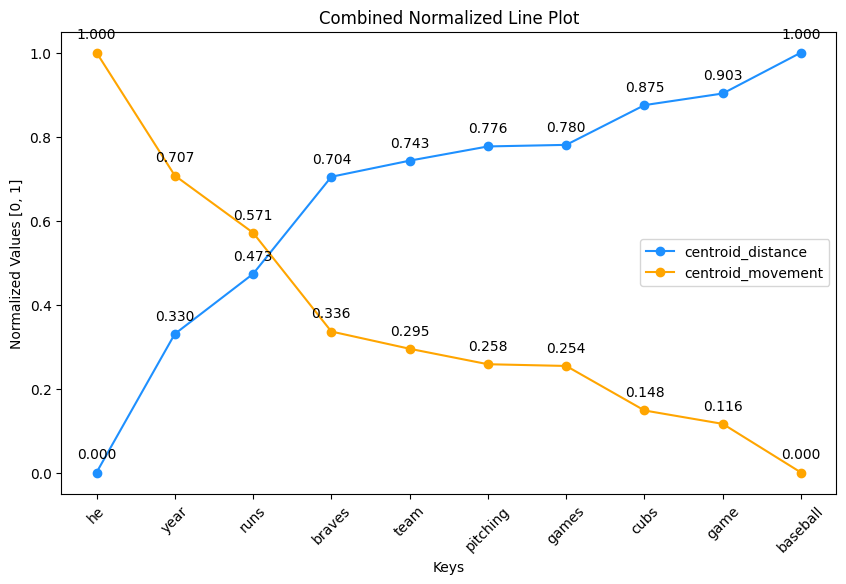

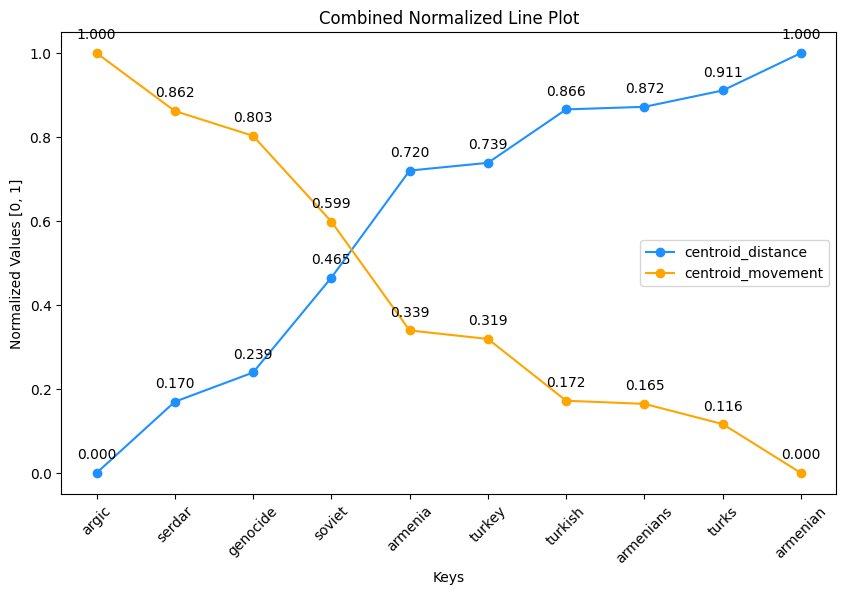

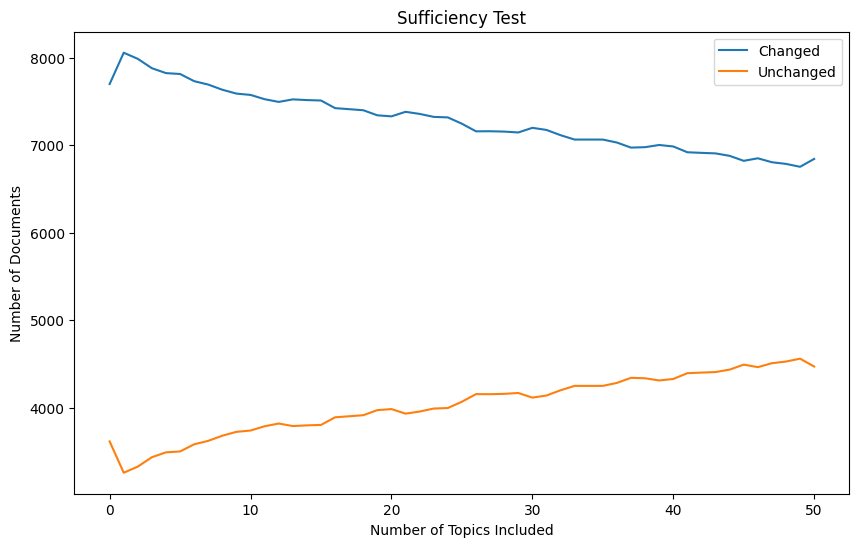

In [7]:
docs = []
count = 0
for text in tqdm(newsgroups_train["data"]):
  count+=1
  docs.append(clean_text(text) + f" c_{count}")

topic_model = BERTopic()
topics, probs = topic_model.fit_transform(docs)
topic_model.get_topic_info()


100%|██████████| 11314/11314 [00:00<00:00, 11671.07it/s]


,Topic,Count,Name,Representation,Representative_Docs
0,-1,4112,-1_the_to_and_for,"[the, to, and, for, of, in, is, from, it, you]",[From Jonas Flygare Subject Re 18 Israelis mur...
1,0,321,0_clipper_encryption_key_chip,"[clipper, encryption, key, chip, escrow, keys,...",[From Clipper Chip Announcement Subject text o...
2,1,199,1_scsi_drive_ide_controller,"[scsi, drive, ide, controller, drives, disk, b...",[From Wayne Smith Subject Re IDE vs SCSI Organ...
3,2,196,2_fbi_batf_fire_compound,"[fbi, batf, fire, compound, atf, koresh, waco,...",[From Jim De Arras Subject Re BATF FBI Murders...
4,3,106,3_car_cars_integra_convertible,"[car, cars, integra, convertible, engine, wago...",[From Chuck Kesler Subject Re Ford Probe Opini...
...,...,...,...,...,...
232,231,10,231_xman_source_9000_xrn,"[xman, source, 9000, xrn, rao, hp, xarchie, ba...",[From Chun Hung Lin Subject Re xman source Nnt...
233,232,10,232_nhl_stars_hockey_halifax,"[nhl, stars, hockey, halifax, names, team, div...",[From Karim Edvard Ahmed Subject Re Truly a sa...
234,233,10,233_wbt_wycliffe_ideological_translators,"[wbt, wycliffe, ideological, translators, deno...",[From catherine c bareiss Subject Re phone num...
235,234,10,234_ir_cycle_xxxxx_wazing,"[ir, cycle, xxxxx, wazing, emitting, detector,...",[From David Prutchi Subject Re Long distance I...


In [8]:
df = pd.DataFrame({"Document": docs, "Topic": topics})
df.head()

,Document,Topic
0,From where s my thing Subject WHAT car is this...,235
1,From Guy Kuo Subject SI Clock Poll Final Call ...,205
2,From Thomas E Willis Subject PB questions Orga...,-1
3,From Joe Green Subject Re Weitek P9000 Organiz...,-1
4,From Jonathan McDowell Subject Re Shuttle Laun...,-1


In [30]:
import pandas as pd

def compare_topics(df1, df2,topic_num):
    ## 1/ Count the number of elements that changed between the two dataframes in Topic column
    # Select only the "Topic" column from each dataframe
    topics1 = df1["Topic"]
    topics2 = df2["Topic"]
    # Compare the two columns and count the number of changes
    changes = (topics1 != topics2).sum()
    # Count the number of elements that remained the same
    same = (topics1 == topics2).sum()

    ## 2/ Count the number of elements that changed to -1 or noise from "topic_num" topic. 
    # Find rows where "Topic" changed from a non-negative value to -1
    changed_rows = (df1['Topic'] == topic_num) & (df2['Topic'] == -1)
    changed_rows_2 = (df1['Topic'] >= 0) & (df2['Topic'] == -1)
    # Extract the rows that satisfy the condition
    changed_rows_df = df1[changed_rows]
    changed_rows_df_2 = df1[changed_rows_2]
    # Get the number of rows that changed
    top2noise = len(changed_rows_df)
    all2noise = len(changed_rows_df_2)

    ## 3/ Check number of changes in topic constricted to "topic_num" topic. 
    # Select rows in df1 where "Topic" is equal to the given topic
    rows_with_given_topic_df1 = df1[df1['Topic'] == topic_num]
    # Find the corresponding rows in df2
    corresponding_rows_df2 = df2.loc[rows_with_given_topic_df1.index]
    # Count the number of rows where the "Topic" value changed
    num_changed_rows = (rows_with_given_topic_df1['Topic'] != corresponding_rows_df2['Topic']).sum()
    # Count the number of rows where the "Topic" value remained the same
    num_same_rows = (rows_with_given_topic_df1['Topic'] == corresponding_rows_df2['Topic']).sum()


    results = {
        "total_changes" : changes, 
        "total_same" : same,
        "topic_to_noise" : top2noise,
        "all_to_noise" : all2noise,
        "topic_change" : num_changed_rows,
        "topic_same" : num_same_rows,
    }

    return results


df1 = pd.DataFrame({"Topic" : [1, 2, 3, 4, 5]})
df2 = pd.DataFrame({"Topic" : [-1, 2, 3, 4, -1]})

compare_topics(df1, df2, 5)




{'total_changes': 2,
 'total_same': 3,
 'topic_to_noise': 1,
 'all_to_noise': 2,
 'topic_change': 1,
 'topic_same': 0}

In [15]:


def remove_word_from_list(word_to_remove, string_list):
    return [string.replace(word_to_remove, '') for string in string_list]

def check_topic_for_comprehensiveness_fit( docs: List[str], k: int) -> Dict[str, str]:
    """
    Take as input a list of topics and the initial documents, perturbs the documents
    by removing one topic word after another and repeats the modeling to find if the
    topic changes.
    """
    ablation_mappings = {}
    anchor_topic_model = BERTopic()
    topics, probs = anchor_topic_model.fit_transform(docs)
    topic_list = anchor_topic_model.get_topic_info()["Representation"]

    # forming doc -> topic pairing
    df_basic_mapping = pd.DataFrame({"Document": docs, "Topic": topics})


    for word in tqdm(topic_list[k+1]):
        new_docs = remove_word_from_list(word, docs)
        new_topics, probs = anchor_topic_model.transform(new_docs)
        df_new_mapping = pd.DataFrame({"Document": docs, "Topic": new_topics})

        ablation_mappings[word] =  compare_topics(df_basic_mapping, df_new_mapping,k)

    return ablation_mappings

def save_topic_for_comprehensiveness_fit( docs: List[str], k: int) -> pd.DataFrame:
    """
    Take as input a list of topics and the initial documents, perturbs the documents
    by removing one topic word after another and repeats the modeling to find if the
    topic changes.
    """
    ablation_mappings = {}
    anchor_topic_model = BERTopic()
    topics, probs = anchor_topic_model.fit_transform(docs)
    topic_list = anchor_topic_model.get_topic_info()#["Representation"]
    c_tf_idf_mappings = anchor_topic_model.topic_representations_

    # forming doc -> topic pairing
    df_basic_mapping = pd.DataFrame({"Document": docs, "Topic": topics})


    for word in tqdm(topic_list[k+1]):
        new_docs = remove_word_from_list(word, docs)
        new_topics, probs = anchor_topic_model.transform(new_docs)
        df_new_mapping = pd.DataFrame({"Document": docs, "Topic": new_topics})

        ablation_mappings[word] =  df_new_mapping

    return ablation_mappings,c_tf_idf_mappings,df_basic_mapping,topic_list

def save_topic_for_comprehensiveness_fit_cumulative(docs: List[str], k: int) -> pd.DataFrame:
    """
    Take as input a list of topics and the initial documents, perturbs the documents
    by removing one topic word after another and repeats the modeling to find if the
    topic changes.
    """
    ablation_mappings = {}
    anchor_topic_model = BERTopic()
    topics, probs = anchor_topic_model.fit_transform(docs)
    topic_list = anchor_topic_model.get_topic_info()["Representation"]
    c_tf_idf_mappings = anchor_topic_model.topic_representations_

    # forming doc -> topic pairing
    df_basic_mapping = pd.DataFrame({"Document": docs, "Topic": topics})

    new_docs = docs # Initialize new_docs with the original documents

    for  word in tqdm(topic_list[k+1]): 
        new_docs = remove_word_from_list(word, new_docs)

        new_topics, probs = anchor_topic_model.transform(new_docs)
        df_new_mapping = pd.DataFrame({"Document": new_docs, "Topic": new_topics})

        ablation_mappings[word] = df_new_mapping

    return ablation_mappings, c_tf_idf_mappings, df_basic_mapping, topic_list

In [16]:
ablation_mappings_cumulative,c_tf_idf_mappings,df_basic_mapping,topic_list = save_topic_for_comprehensiveness_fit_cumulative(docs,2)

100%|██████████| 10/10 [02:04<00:00, 12.45s/it]


In [21]:
topic_list

,Topic,Count,Name,Representation,Representative_Docs
0,-1,3679,-1_to_the_and_of,"[to, the, and, of, for, in, is, it, you, from]",[From Brian Ceccarelli 602 621 9615 Subject Re...
1,0,511,0_he_year_baseball_team,"[he, year, baseball, team, game, runs, braves,...",[Subject Re Eck vs Rickey was Re Rickey s whin...
2,1,289,1_clipper_key_chip_encryption,"[clipper, key, chip, encryption, escrow, keys,...",[From Pat Myrto Subject Re Once tapped your co...
3,2,240,2_gun_guns_firearms_militia,"[gun, guns, firearms, militia, weapons, amendm...",[From C D Tavares Subject Re My Gun is like my...
4,3,195,3_tobacco_health_mail_address,"[tobacco, health, mail, address, smokeless, ni...",[Subject Space FAQ 02 15 Network Resources Fro...
...,...,...,...,...,...
221,220,10,220_software_level_process_challenger,"[software, level, process, challenger, shuttle...",[From fred j mccall 575 3539 Subject Re Level ...
222,221,10,221_solar_sail_sails_accelerations,"[solar, sail, sails, accelerations, 45g, proje...",[From Bill Higgins Beam Jockey Subject Re Sola...
223,222,10,222_server_x11_xwd_xdm,"[server, x11, xwd, xdm, usr, pid, sigpipe, ram...",[From S Ramakrishnan Subject Re Mwm title drag...
224,223,10,223_appcontext_application_callback_huub,"[appcontext, application, callback, huub, xtap...",[From Patrick L Mahan Subject Re How do I find...


In [22]:
df_basic_mapping

,Document,Topic
0,From where s my thing Subject WHAT car is this...,-1
1,From Guy Kuo Subject SI Clock Poll Final Call ...,193
2,From Thomas E Willis Subject PB questions Orga...,20
3,From Joe Green Subject Re Weitek P9000 Organiz...,-1
4,From Jonathan McDowell Subject Re Shuttle Laun...,220
...,...,...
11309,From Jim Zisfein Subject Re Migraines and scan...,17
11310,From Subject Screen Death Mac Plus 512 Lines 2...,54
11311,From Will Estes Subject Mounting CPU Cooler in...,-1
11312,From Steven Collins Subject Re Sphere from 4 p...,10


In [24]:
topic_list.to_csv("/home/abpal/WorkFiles/Results/Comprehensiveness_Raw/Base_Results/base.csv")

In [25]:
df_basic_mapping.to_csv("/home/abpal/WorkFiles/Results/Comprehensiveness_Raw/Base_Results/df_basic_mapping.csv")

In [27]:
import json

# Specify the file path where you want to save the JSON file
file_path = "/home/abpal/WorkFiles/Results/Comprehensiveness_Raw/Base_Results/c_tf_idf_mappings.json"

# Open the file in write mode and use json.dump to write the dictionary to the file
with open(file_path, 'w') as json_file:
    json.dump(c_tf_idf_mappings, json_file)



# Centroid Test

In [11]:
from sentence_transformers import SentenceTransformer, util
model = SentenceTransformer('all-MiniLM-L6-v2')

# Two lists of sentences
sentences1 = ['The cat sits outside',
             'A man is playing guitar',
             'The new movie is awesome']

sentences2 = ['The dog plays in the garden',
              'A woman watches TV',
              'The new movie is so great']

#Compute embedding for both lists
embeddings1 = model.encode(sentences1, convert_to_tensor=True)
embeddings2 = model.encode(sentences2, convert_to_tensor=True)

#Compute cosine-similarities
cosine_scores = util.cos_sim(embeddings1, embeddings2)

#Output the pairs with their score
for i in range(len(sentences1)):
    print("{} \t\t {} \t\t Score: {:.4f}".format(sentences1[i], sentences2[i], cosine_scores[i][i]))

The cat sits outside 		 The dog plays in the garden 		 Score: 0.2838
A man is playing guitar 		 A woman watches TV 		 Score: -0.0327
The new movie is awesome 		 The new movie is so great 		 Score: 0.8939


In [12]:
# distance of each sentence from the centroid
centroid = embeddings1.mean(axis=0)
for i in range(len(embeddings1)):
    centriod_dist = util.cos_sim(centroid,embeddings1[i])
    print(centriod_dist)

tensor([[0.5800]], device='cuda:0')
tensor([[0.5995]], device='cuda:0')
tensor([[0.5645]], device='cuda:0')


In [15]:
import torch

tensor = torch.randn(3, 2)
row_to_remove = 0

new_tensor = torch.cat((tensor[:row_to_remove], tensor[row_to_remove+1:]))


In [16]:
import numpy as np 

# movement of centroid for the absence of each sentence
centroid_base = embeddings1.mean(axis=0).cpu()
for i in range(len(embeddings1)):
    embeddings_new = torch.cat((embeddings1[:i], embeddings1[i+1:]))
    new_centroid = embeddings_new.mean(axis=0).cpu()
    centriod_movt =  np.linalg.norm(centroid_base - new_centroid)

    print(centriod_movt)

0.40729418
0.40028247
0.41278866


In [ ]:
import torch

def centroid_tests(topic_list):
    centroid_distance = {}
    centroid_movement = {}

    #find embeddings
    embeddings = model.encode(topic_list, convert_to_tensor=True)
    centroid = embeddings.mean(axis=0)

    # distance of each sentence from the centroid
    for i in range(len(embeddings)):
        centriod_dist = util.cos_sim(centroid,embeddings[i])
        centroid_distance[topic_list[i]] = float(centriod_dist[0,0])
    
    # movement of centroid for the absence of each sentence
    for i in range(len(embeddings)):
        embeddings_new = torch.cat((embeddings[:i], embeddings[i+1:]))
        new_centroid = embeddings_new.mean(axis=0).cpu()
        centriod_movt =  np.linalg.norm(centroid.cpu() - new_centroid)
        centroid_movement[topic_list[i]] = float(centriod_movt)

    return {"centroid_distance":centroid_distance , "centroid_movement":centroid_movement}
        
# centroid_tests(list(ablation_mappings.keys()))

# Comprehensiveness + Centroid Test : 

In [ ]:
k = 200
ablation_top_k_topics = {}
centroid_test_results = {}

for topic_i in tqdm(range(100,k)):
    ablation_top_k_topics[f"Topic_{topic_i}"] = check_topic_for_comprehensiveness_fit(docs,topic_i)
print("========Comprehensiveness Ablation Tests done========")

In [ ]:
k = 100
ablation_top_k_topics_RAW = {}
centroid_test_results = {}

for topic_i in tqdm(range(k)):
    ablation_top_k_topics_RAW[f"Topic_{topic_i}"] = save_topic_for_comprehensiveness_fit(docs,topic_i)
print("========Comprehensiveness Ablation Tests done========")

In [17]:
k = 20
ablation_top_k_topics_RAW = {}
centroid_test_results = {}

for topic_i in tqdm(range(k)):
    ablation_top_k_topics_RAW[f"Topic_{topic_i}"],c_tf_idf_mappings,df_basic_mapping,topic_list = save_topic_for_comprehensiveness_fit_cumulative(docs,topic_i)
print("========Comprehensiveness Ablation Tests done========")

100%|██████████| 20/20 [45:19<00:00, 135.95s/it]

========Comprehensiveness Ablation Tests done========


In [39]:
topic_list

0         [the, to, and, for, of, in, is, from, it, you]
1      [gun, guns, firearms, weapons, militia, contro...
2      [clipper, encryption, key, chip, escrow, keys,...
3      [nist, address, mail, ncsl, japanese, computer...
4      [moon, lunar, billion, space, mining, prize, h...
                             ...                        
237    [diamond, cursor, lindbergh, 1024x768x256, dri...
238    [aids, god, punishment, sin, jesus, atonement,...
239    [eisa, isa, motherboard, bus, 16mb, 486, schau...
240    [analog, mf, sampling, digital, 5v, signal, sw...
241    [book, scrolls, butera, sea, books, religions,...
Name: Representation, Length: 242, dtype: object

In [19]:
ablation_top_k_topics_RAW["Topic_0"]["algorithm"]

,Document,Topic
0,From where s my thing Subject WHAT car is this...,5
1,From Guy Kuo Subject SI Clock Poll Final Call ...,-1
2,From Thomas E Willis Subject PB questions Orga...,-1
3,From Joe Green Subject Re Weitek P9000 Organiz...,-1
4,From Jonathan McDowell Subject Re Shuttle Laun...,-1
...,...,...
11309,From Jim Zisfein Subject Re Migraines and scan...,6
11310,From Subject Screen Death Mac Plus 512 Lines 2...,-1
11311,From Will Estes Subject Mounting CPU Cooler in...,-1
11312,From Steven Collins Subject Re Sphere from 4 p...,78


In [21]:
import os 
def save_comprehensiveness_raw(data,path):
    for topic in range(20):
        top_data = data[f"Topic_{topic}"]
        try: 
            os.mkdir(path+f"/Topic_{topic}") 
        except : 
            pass
        for word in top_data.keys():
            top_data[word].to_csv(path_or_buf=path+f"/Topic_{topic}/{word}.csv",
                                  columns=["Topic"],
                                  index=False,
                                  header=False
                                  )

save_comprehensiveness_raw(ablation_top_k_topics_RAW,"/home/abpal/WorkFiles/Results/Comprehensiveness_Raw_Cumulative")

In [22]:
import os
import pandas as pd

def load_comprehensiveness_raw(path,k):
    loaded_data = {}
    for topic in range(k):
        topic_path = os.path.join(path, f"Topic_{topic}")
        if os.path.exists(topic_path):
            topic_data = {}
            for file_name in os.listdir(topic_path):
                word = os.path.splitext(file_name)[0]
                file_path = os.path.join(topic_path, file_name)
                topic_df = pd.read_csv(file_path, names=["Topic"])
                topic_data[word] = topic_df
            loaded_data[f"Topic_{topic}"] = topic_data
    return loaded_data

# Example usage:
loaded_data = load_comprehensiveness_raw("/home/abpal/WorkFiles/Results/Comprehensiveness_Raw_Cumulative",100)


In [24]:
loaded_data["Topic_0"]["algorithm"]

,Topic
0,5
1,-1
2,-1
3,-1
4,-1
...,...
11309,6
11310,-1
11311,-1
11312,78


In [37]:
df_basic_mapping 

results = {}

for topic_i in loaded_data.keys():
    results[topic_i] = {}
    for words in loaded_data[topic_i].keys():
        results[topic_i][words] = compare_topics(df_basic_mapping,loaded_data[topic_i][words],int(topic_i.split("_")[-1]))

In [38]:
results["Topic_0"]

{'chip': {'total_changes': 8075,
  'total_same': 3239,
  'topic_to_noise': 179,
  'all_to_noise': 1934,
  'topic_change': 369,
  'topic_same': 0},
 'key': {'total_changes': 8104,
  'total_same': 3210,
  'topic_to_noise': 163,
  'all_to_noise': 1862,
  'topic_change': 369,
  'topic_same': 0},
 'encryption': {'total_changes': 8074,
  'total_same': 3240,
  'topic_to_noise': 163,
  'all_to_noise': 1798,
  'topic_change': 369,
  'topic_same': 0},
 'nsa': {'total_changes': 8069,
  'total_same': 3245,
  'topic_to_noise': 185,
  'all_to_noise': 1872,
  'topic_change': 369,
  'topic_same': 0},
 'keys': {'total_changes': 8097,
  'total_same': 3217,
  'topic_to_noise': 176,
  'all_to_noise': 1883,
  'topic_change': 369,
  'topic_same': 0},
 'escrow': {'total_changes': 8104,
  'total_same': 3210,
  'topic_to_noise': 170,
  'all_to_noise': 1895,
  'topic_change': 369,
  'topic_same': 0},
 'government': {'total_changes': 8079,
  'total_same': 3235,
  'topic_to_noise': 178,
  'all_to_noise': 1984,
  

In [41]:
import json
import numpy as np

class NpEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        if isinstance(obj, np.floating):
            return float(obj)
        if isinstance(obj, np.ndarray):
            return obj.tolist()
        return super(NpEncoder, self).default(obj)
    
# Specify the file path where you want to save the JSON file
file_path = "/home/abpal/WorkFiles/Results/Comprehensiveness_Raw_Cumulative/Stats/results.json"

# Open the file in write mode and use json.dump to write the dictionary to the file
with open(file_path, 'w') as json_file:
    json.dump(results, json_file,cls=NpEncoder)



# Understand Stochasticity

In [34]:
anchor_topic_model = BERTopic()
topics, probs = anchor_topic_model.fit_transform(docs)
topic_list = anchor_topic_model.get_topic_info()["Representation"]

# forming doc -> topic pairing
df_basic_mapping_1 = pd.DataFrame({"Document": docs, "Topic": topics})
df_basic_mapping_1

,Document,Topic
0,From where s my thing Subject WHAT car is this...,7
1,From Guy Kuo Subject SI Clock Poll Final Call ...,169
2,From Thomas E Willis Subject PB questions Orga...,-1
3,From Joe Green Subject Re Weitek P9000 Organiz...,-1
4,From Jonathan McDowell Subject Re Shuttle Laun...,1
...,...,...
11309,From Jim Zisfein Subject Re Migraines and scan...,2
11310,From Subject Screen Death Mac Plus 512 Lines 2...,-1
11311,From Will Estes Subject Mounting CPU Cooler in...,-1
11312,From Steven Collins Subject Re Sphere from 4 p...,14


In [35]:
topics[:5]

[7, 169, -1, -1, 1]

In [36]:
anchor_topic_model = BERTopic()
topics, probs = anchor_topic_model.fit_transform(docs)
topic_list = anchor_topic_model.get_topic_info()["Representation"]

# forming doc -> topic pairing
df_basic_mapping_2 = pd.DataFrame({"Document": docs, "Topic": topics})
df_basic_mapping_2

,Document,Topic
0,From where s my thing Subject WHAT car is this...,-1
1,From Guy Kuo Subject SI Clock Poll Final Call ...,170
2,From Thomas E Willis Subject PB questions Orga...,43
3,From Joe Green Subject Re Weitek P9000 Organiz...,-1
4,From Jonathan McDowell Subject Re Shuttle Laun...,-1
...,...,...
11309,From Jim Zisfein Subject Re Migraines and scan...,83
11310,From Subject Screen Death Mac Plus 512 Lines 2...,-1
11311,From Will Estes Subject Mounting CPU Cooler in...,-1
11312,From Steven Collins Subject Re Sphere from 4 p...,10


In [36]:
count_common_buckets(df_basic_mapping_1["Topic"], df_basic_mapping_2["Topic"])

278

In [23]:
compare_topics(df_basic_mapping_1, df_basic_mapping_2,6)

{'total_changes': 0,
 'total_same': 11314,
 'topic_to_noise': 0,
 'all_to_noise': 0,
 'topic_change': 0,
 'topic_same': 101}

In [38]:
def count_common_buckets(list1, list2):
    # Create dictionaries to store buckets for each list
    buckets1 = {}
    buckets2 = {}

    # Iterate through the lists to form buckets
    for index, (num1, num2) in enumerate(zip(list1, list2)):
        if num1 != -1:
            if num1 not in buckets1:
                buckets1[num1] = []
            buckets1[num1].append(index)

        if num2 != -1:
            if num2 not in buckets2:
                buckets2[num2] = []
            buckets2[num2].append(index)

    # Compare the similarity of bucket structures
    common_buckets_count = 0
    for key1 in buckets1:
        for key2 in buckets2:
            common_indices = set(buckets1[key1]) & set(buckets2[key2])
            if common_indices:
                common_buckets_count += 1

    return common_buckets_count

# Example usage:
list1 = [1,2,3,4,1,2,3,4]
list2 = [2,3,4,1,2,3,4,1]

common_buckets = count_common_buckets(list1, list2)

print("Common Buckets:", common_buckets)


Common Buckets: 4


In [39]:
def run_stochasticity_count(runs: int):
    counts = []
    for i in tqdm(range(runs)):
        anchor_topic_model = BERTopic()
        topics, probs = anchor_topic_model.fit_transform(docs)
        topic_list1 = anchor_topic_model.get_topic_info()["Representation"]

        # forming doc -> topic pairing
        df_basic_mapping_1 = pd.DataFrame({"Document": docs, "Topic": topics})

        anchor_topic_model = BERTopic()
        topics, probs = anchor_topic_model.fit_transform(docs)
        topic_list2 = anchor_topic_model.get_topic_info()["Representation"]

        # forming doc -> topic pairing
        df_basic_mapping_2 = pd.DataFrame({"Document": docs, "Topic": topics})
        print(len(topic_list1),len(topic_list2))
        counts.append(count_common_buckets(df_basic_mapping_1["Topic"], df_basic_mapping_2["Topic"]))

    return counts 

run_stochasticity_count(
    runs = 5
)

 20%|██        | 1/5 [00:40<02:42, 40.53s/it]

237 219


 40%|████      | 2/5 [01:20<02:01, 40.48s/it]

215 236


 60%|██████    | 3/5 [02:05<01:25, 42.55s/it]

233 239


 80%|████████  | 4/5 [02:50<00:43, 43.39s/it]

218 225


100%|██████████| 5/5 [03:36<00:00, 43.23s/it]

228 232


[285, 296, 293, 287, 289]

# Run centroid tests, save etc

In [77]:
import numpy as np 
import torch
for topic_i in tqdm(range(100,k)):
    centroid_test_results[f"Topic_{topic_i}"] = centroid_tests(list(ablation_top_k_topics[f"Topic_{topic_i}"].keys()))
print("========Centroid Tests done========")

100%|██████████| 100/100 [00:00<00:00, 181.88it/s]

========Centroid Tests done========


In [25]:
import json
import numpy as np

class NpEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        if isinstance(obj, np.floating):
            return float(obj)
        if isinstance(obj, np.ndarray):
            return obj.tolist()
        return super(NpEncoder, self).default(obj)


with open('Results/Ablation_Final/ablation_RAW_100.json', 'w') as fp:
    json.dump(ablation_top_k_topics_RAW, fp,cls=NpEncoder)

# with open('Results/Ablation_Final/centroid_result_200.json', 'w') as fp:
    # json.dump(centroid_test_results, fp,cls=NpEncoder)

In [ ]:
while True:
    pass

# c-tf-idf numbers and rank correlation

In [42]:
anchor_topic_model = BERTopic()
topics, probs = anchor_topic_model.fit_transform(docs)
topic_list = anchor_topic_model.get_topic_info()["Representation"]

# forming doc -> topic pairing
df_basic_mapping_ = pd.DataFrame({"Document": docs, "Topic": topics})

In [45]:
len(set(topics))

245

In [56]:
anchor_topic_model.topic_representations_

{-1: [('the', 0.004001173393700668),
  ('to', 0.0038867828699836234),
  ('for', 0.0037828558747706113),
  ('of', 0.0037471069328812957),
  ('and', 0.0037246135155925863),
  ('in', 0.0036972309257993475),
  ('is', 0.003580020514716617),
  ('from', 0.003566082473923622),
  ('it', 0.003534473143340908),
  ('you', 0.0035188762860559066)],
 0: [('clipper', 0.017168714838490067),
  ('key', 0.015362246416456277),
  ('encryption', 0.01518368823616912),
  ('chip', 0.015018226152477948),
  ('escrow', 0.010645646121140998),
  ('keys', 0.00945704480498497),
  ('government', 0.008645721787624669),
  ('crypto', 0.007864839285614805),
  ('secure', 0.007650991382692927),
  ('nsa', 0.00749946145173624)],
 1: [('keyboard', 0.00977220058729129),
  ('mail', 0.007593759020955795),
  ('health', 0.007308016243972676),
  ('tobacco', 0.0070277384452378765),
  ('typing', 0.0062473224906844085),
  ('address', 0.006163866360147878),
  ('rsi', 0.0061630756713715405),
  ('nist', 0.005780655340203438),
  ('list', 0.

In [ ]:
import scipy.stats

# Example data
x = [25, 15, 10, 5, 30]
y = [5, 10, 15, 25, 30]

# Calculate Spearman's rank correlation coefficient
rho, p_value = scipy.stats.spearmanr(x, y)

# Print the result
print(f"Spearman's rank correlation coefficient: {rho}")
print(f"P-value: {p_value}")

# Interpret the result
if p_value < 0.05:
    print("The correlation is statistically significant.")
else:
    print("The correlation is not statistically significant.")


# Sufficiency

In [ ]:
def filter_documents(documents, allowed_words):
    filtered_documents = []

    for document in documents:
        filtered_document = []
        for word in document.split():
            if word in allowed_words:
                filtered_document.append(word)
        filtered_documents.append(" ".join(filtered_document))

    return filtered_documents

In [ ]:

def check_topic_for_comprehensiveness_fit( docs: List[str], k: int) -> Dict[str, str]:
    """
    Take as input a list of topics and the initial documents, perturbs the documents
    by keeping only the topic words present in the top-k topics and see how many of the 
    documents fall into the same bin as before. 
    """
    ablation_mappings = {}
    anchor_topic_model = BERTopic()
    topics, probs = anchor_topic_model.fit_transform(docs)
    topic_list = anchor_topic_model.get_topic_info()["Representation"]

    # forming doc -> topic pairing
    df_basic_mapping = pd.DataFrame({"Document": docs, "Topic": topics})


    for topic in tqdm(topic_list[:k+1]):
        new_docs = remove_word_from_list(word, docs)
        new_topics, probs = anchor_topic_model.transform(new_docs)
        df_new_mapping = pd.DataFrame({"Document": docs, "Topic": new_topics})

        ablation_mappings[word] =  compare_topics(df_basic_mapping, df_new_mapping)

    return ablation_mappings
